In [1]:
from matplotlib.pyplot import imread as imread
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def convert_RGB_to_BW(img, threshold = 100):
    res = np.zeros((img.shape[0], img.shape[1]))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            # 3 bileşenlerin ortalaması belirlenen 
            # threshold üstünde ise 1 olarak kabul edeceğiz
            if(sum(img[i,j,:])/3 > threshold):
                res[i,j] = 1
            # değil ise 0 olarak kabul edeceğiz
            else:
                res[i,j] = 0
    return res

In [3]:
def get_histogram(img):
    res = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            item = img[i,j]
            if(item in res):
                res[item] += 1
            else:
                res[item] = 1
    return res

In [4]:
class MyMatrix():
    def __init__(self, _d, _f):
        self.D = _d
        self.f = _f

In [5]:
def Create_D_F_uzun(img):
    d = set()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 1:
                d.add((i,j))
    f = {}
    for i,j in d:
        f[(i,j)] = 1
    return MyMatrix(d,f)

In [6]:
def Create_D_F(img):
    d = {(i,j)   for i in range(img.shape[0])
                 for j in range(img.shape[1])
                 # Değeri 1 olan elemanları sadece alınacak
                 if img[i,j] == 1
        }
    f = {(i,j):1 for i,j in d}
    return MyMatrix(d,f)

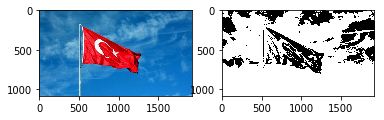

In [9]:
# bir foto yükleme
img = imread(r'C:\Users\KARACA\Documents\GoruntuIsleme\flag.jpg')

# Beyaz Siyaha Çevirmek
img_bw = convert_RGB_to_BW(img)

# Sprace Matrisi oluşturmak
spraceMat = Create_D_F(img_bw)

plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(img_bw, cmap='gray')
plt.show()

In [10]:
print('spraceMat.D ilk 5 eleman :')
D_ilk_5_eleman = list(spraceMat.D)[0:5]
for i in D_ilk_5_eleman:
    print('\t', i)

spraceMat.D ilk 5 eleman :
	 (197, 1097)
	 (381, 392)
	 (607, 1522)
	 (312, 241)
	 (259, 938)


In [11]:
print('spraceMat.f ilk 5 eleman :')
for i in D_ilk_5_eleman:
    print('\tspraceMat.f[' + str(i) + ']\t= ' + str(spraceMat.f[i]))

spraceMat.f ilk 5 eleman :
	spraceMat.f[(197, 1097)]	= 1
	spraceMat.f[(381, 392)]	= 1
	spraceMat.f[(607, 1522)]	= 1
	spraceMat.f[(312, 241)]	= 1
	spraceMat.f[(259, 938)]	= 1


In [12]:
shape = img_bw.shape
print('BW image shape : \t\t' + str(shape))
print('BW image eleman sayisi :\t' + str(shape[0] * shape[1]))
print('spraceMat.D elemanlar sayisi :\t' + str(len(spraceMat.D)))

BW image shape : 		(1080, 1920)
BW image eleman sayisi :	2073600
spraceMat.D elemanlar sayisi :	1583127
